# '클래스 불균형' 
머신러닝 모델을 평가하는 하나의 지표로서 F1 score이란 것을 고려한다. F1 score은 Precision과 Recall의 조화평균으로부터 나오는 지표이다. F1 score은 그럼 언제 사용할까? 주로 데이터 Class(Lable)이 불균형 구조일 때 모델 성능을 정확히 평가한다고 한다. 

## Weight balancing?
Weight balancing은 Train 데이터에서 각 loss를 계산할 때 특정 클래스에 대해서는 더 큰 loss를 계산해주는 것이다. 즉, 이전에 언급했던 '부동산 구입' 예시에서 처럼 '부동산을 구입해' 라는 클래스에는 더 큰 정확도가 필요하므로 '부동산을 구입해' 라는 클래스에는 더 큰 loss를 취해주는 것이다. 

 

또 다른 방법으로는 클래스의 비율에 대해 가중치를 두는 방법이다. 예를 들어 두 개의 클래스 비율이 1:9라면 가중치를 9:1로 줌으로써 전체 클래스의 loss에 동일하게 기여하도록 한다.

 

Weight balancing 방법 중 Focal loss라는 방법도 있다. 예를들어 어떤 딥러닝 분류 모델에서 A,B,C라는 다중 클래스가 존재하고 A클래스로 분류하기 쉽지만 상대적으로 B,C 클래스는 분류하기가 힘들다고 가정해보자. 100번의 Epoch를 실시할 것이고 10번의 Epoch만에 99%의 정확도를 얻었다고 한다. 만약 아무런 조치도 취하지 않는다면 나마지 90번의 Epoch를 시행하는 동안 이미 A클래스를 쉽게 분류할 수 있음에도 계속적으로 A클래스 데이터에 대한 loss값이 기여할 것이다. 그렇다면 A클래스의 loss가 기여하는 시간동안 B,C 클래스 데이터에 더 집중을 하면 전체적인 분류 정확도가 높아지지 않을까? 즉 1번의 Epoch을 실시하고 loss에 의한 역전파(backpropagation)방법을 통해 파라미터(weight값)를 업데이트 하는데 이 순간에 loss를 계산할 때 현재까지 클래스별 정확도를 고려하여 가중치를 준다면 더욱 더 모델의 분류 정확도가 높아지지 않을까?

## LogLoss?
손실 함수.
모델의 출력값과 정답의 오차를 정의하는 함수이다. 신경망을 학습할 때, 학습이 잘 되고 있는지 평가하는 하나의 지표로 사용된다. 결국 신경망의 성능이 얼마나 나쁜지를 나타내는 지표이다. 
모델이 예측한 확률을 직접적으로 반영하여 평가한다.  
잘못 예측할수록 패널티를 부여한다. 예로, 100%의 확률(확신)로 답을 구한 경우 log loss는 -log(1.0) = 0이다. 80% 확률의 경우에는, -log(0.8) = 0.22314이다. 60% 확률의 경우에는, -log(0.6) = 0.51082이다.

https://mkjjo.github.io/python/2019/01/04/smote_duplicate.html

### 손실 줄이기?
https://developers.google.com/machine-learning/crash-course/reducing-loss/an-iterative-approach

https://dacon.io/competitions/open/235551/talkboard/400298

https://angeloyeo.github.io/2020/08/16/gradient_descent.html

https://m.blog.naver.com/ehdgus8725/222189765315

In [ ]:
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.svm import SVC

In [ ]:

n0 = 200; n1 = 20
rv1 = sp.stats.multivariate_normal([-1, 0], [[1, 0], [0, 1]])
rv2 = sp.stats.multivariate_normal([+1, 0], [[1, 0], [0, 1]])
X0 = rv1.rvs(n0, random_state=0)
X1 = rv2.rvs(n1, random_state=0)
X_imb = np.vstack([X0, X1])
y_imb = np.hstack([np.zeros(n0), np.ones(n1)])

x1min = -4; x1max = 4
x2min = -2; x2max = 2
xx1 = np.linspace(x1min, x1max, 1000)
xx2 = np.linspace(x2min, x2max, 1000)
X1, X2 = np.meshgrid(xx1, xx2)

def classification_result2(X, y, title=""):
    plt.contour(X1, X2, rv1.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    plt.contour(X1, X2, rv2.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    model = SVC(kernel="linear", C=1e4, random_state=0).fit(X, y)
    Y = np.reshape(model.predict(np.array([X1.ravel(), X2.ravel()]).T), X1.shape)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', label="0 클래스")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label="1 클래스")
    plt.contour(X1, X2, Y, colors='k', levels=[0.5])
    y_pred = model.predict(X)
    plt.xlim(-4, 4)
    plt.ylim(-3, 3)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    return model

# 불균형 데이터

# UnderSampling

## 무작위 샘플링

In [ ]:
from imblearn.under_sampling import RandomUnderSampler 

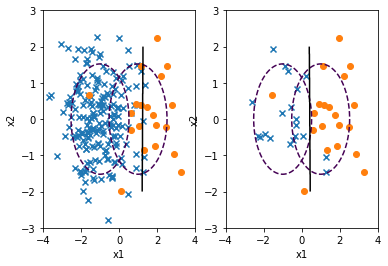

In [ ]:

X_samp, y_samp = RandomUnderSampler(random_state=0).fit_sample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

무작위 랜덤 샘플링 과정을 거치면 위와 같은 그림이 나오게 됩니다. 분포가 높은 클래스의 값을 어떠한 조건 없이 무작위로 삭제하는 과정이며 이와 같은 과정을 통해서 분포가 낮은 클래스의 데이터 크기와 맞출 수 있게 됩니다.

어떠한 조건 없이 데이터 분포를 맞추는 것이기 때문에 걸리는 시간이 굉장히 빠른 장점이 있습니다.
대신 어떠한 조건도 없는게 단점.


## Tomek link

토멕링크 방법론은 분포가 작은 클래스의 데이터에서 가장 가까운 분포가 높은 데이터의 위치를 찾는 것입니다. 즉, 서로 다른 클래스가 있을 때 서로 다른 클래스끼리 가장 가까운 데이터들이 토멕링크로 묶여서 토멕링크 중 분포가 높은 데이터를 제거하는 방법론입니다.

In [ ]:
from imblearn.under_sampling import TomekLinks

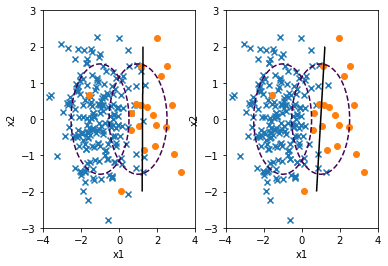

In [ ]:
X_samp, y_samp = TomekLinks().fit_sample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

Tomek link는 분포가 높은 클래스의 중심분포는 어느정도 유지하면서 경계선을 조정하기 때문에 무작위로 삭제하는 샘플링보다 정보의 유실을 크게 방지할 수 있지만 **토멕링크로 묶이는 값이 한정적이기 때문에 큰 언더 샘플링의 효과를 얻을 수 없다는 단점이 있습니다.**

## CNN (Condensed Nearest Neighbour)
CNN 방법은 최근접인 클래스 분포 데이터를 삭제하면서 샘플링하는 방법론입니다.

1. 분포가 작은 클래스르 S분포로 둡니다.

2. 분포가 큰 클래스를 랜덤으로 하나 선택한 뒤 그 데이터 위치에서 가장 가까운 데이터를 선택했을 때 S 분포에 포함 되어 있지 않은 데이터라면 제거합니다.

3. 가장 가까운 값이 S분포가 나올 때까지 2번을 반복합니다.





In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour

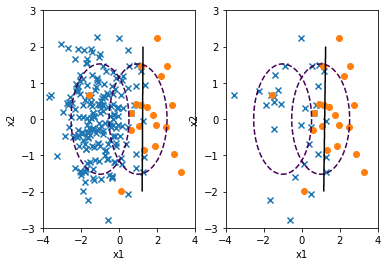

In [ ]:
X_samp, y_samp = CondensedNearestNeighbour(random_state=0).fit_sample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

이 과정을 거치면 분포가 큰 클래스 값을 효율적으로 제거할 수 있게 됩니다.

## One Sided Selection

토멕링크로 먼저 데이터를 제거한 후 분포가 큰 클래스 내부에서 CNN방법으로 데이터를 데이터를 제거하는 과정을 거치는 방법입니다.

In [ ]:
from imblearn.under_sampling import OneSidedSelection

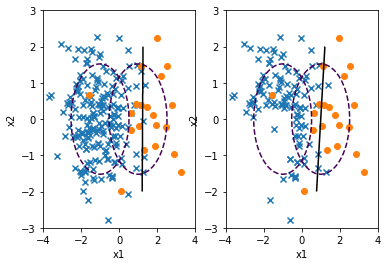

In [ ]:
X_samp, y_samp = OneSidedSelection(random_state=0).fit_sample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

## ENN (Edited Nearest Neighbours)
소수 클래스 주변의 다중 클래스 값을 제거하는 방법론입니다. 해당 방법론은 토멕링크 방법론 처럼 클래스를 구분하는 임계점을 다중 클래스 쪽으로 밀어낼 수 있지만 제거 효과가 크지 않은 것을 알 수 있습니다.

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours

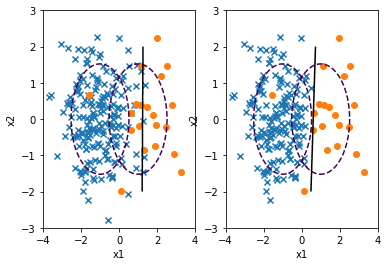

In [ ]:
X_samp, y_samp = EditedNearestNeighbours(kind_sel="all", n_neighbors=5, random_state=0).fit_sample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

## Neighbourhood Cleansing Rule 
CNN(최근접 분포데이터 삭제) 과 ENN(소수클래스 주변 데이터 삭제) 섞은 방법. 제거는 별로 안되지만 조금 더 직관적으로 두 클래스를 나눌수 있습니다.

In [ ]:
 from imblearn.under_sampling import NeighbourhoodCleaningRule

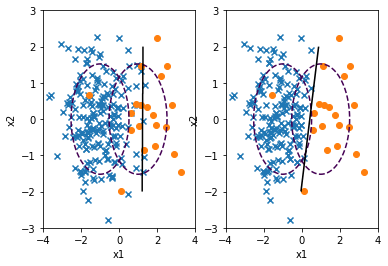

In [ ]:
X_samp, y_samp = NeighbourhoodCleaningRule(kind_sel="all", n_neighbors=5, random_state=0).fit_sample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

# OVER Sampling (Up Sampling)
장점: 정보의 손실을 막을 수 있다.
단점: 여러 유형의 관측치를 다수 추가하기 때문에 오히려 오버피팅된다.

## Random Over Sampling
무작위로 분포가 작은 클래스의 데이터를 생성하는 것을 말합니다. 즉, 소수의 클래스 데이터를 반복해서 넣는 것으로 가중치를 증가시키는 것과 비슷합니다.  
*무작위로 소수 클래스의 데이터를 반복해서 집어넣는 방법이기 때문에 반복 데이터 삽입으로 인한 오버피팅 문제가 발생할 수 있습니다.*

In [ ]:
from imblearn.over_sampling import RandomOverSampler

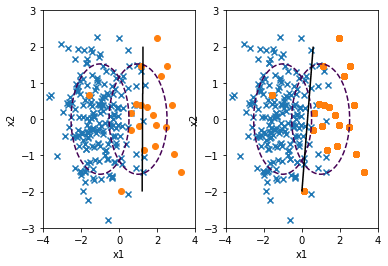

In [ ]:
X_samp, y_samp = RandomOverSampler(random_state=0).fit_sample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

## ADASYN(Adaptive Synthetic Sampling) 
분포가 작은 클래스 데이터와 그 데이터와 가장 가까운 무작위의 K개의 데이터 사이에 가상의 직선을 그려서 직선상에 존재하는 가상의 분포가 작은 클래스 데이터를 생성하는 것을 말합니다.
해당 방법론을 통해서 단순 무작위 오버샘플링으로 인해 발생하는 과적합 문제를 해결할 수 있습니다.  
 **단순 오버 샘플링은 데이터를 무작위로 가중치를 기반하여 복제하는 것이기 때문에 해당 방법론을 통한 오버샘플링이 좀 더 나은 방법론이라고 말 할 수 있을 것 같습니다.**  
  단점으로는 시간이 좀 걸리는 문제가 있습니다.

In [ ]:
from imblearn.over_sampling import ADASYN

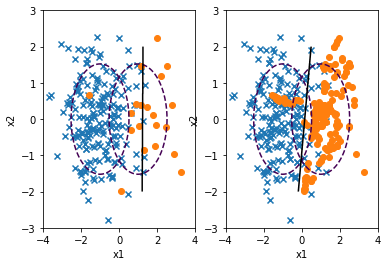

In [ ]:
X_samp, y_samp = ADASYN(random_state=0).fit_sample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

## SMOTE
SMOTE는 ADASYN과 같은 방법론으로 데이터를 생성하지만 생성된 데이터가 분포가 적은 클래스에 포함되는 것이 아니라 분류 모형에 따라서 다르게 분류합니다.

In [ ]:
from imblearn.over_sampling import SMOTE

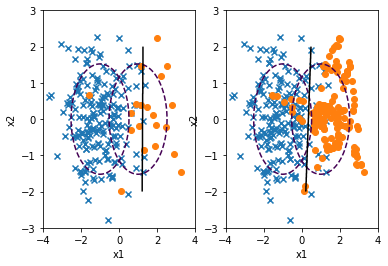

In [ ]:
X_samp, y_samp = SMOTE(random_state=4).fit_sample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

# Combine Sampling
오버샘플링과 언더샘플링을 결합한 샘플링 방법론

## SMOTE + ENN( 가까운 데이터 삭제)


In [ ]:
 from imblearn.combine import SMOTEENN

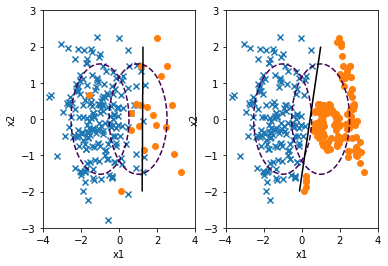

In [ ]:
X_samp, y_samp = SMOTEENN(random_state=0).fit_sample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

## SMOTE + TOMEK(가까운 클래스 분포 삭제)

In [ ]:
 from imblearn.combine import SMOTETomek

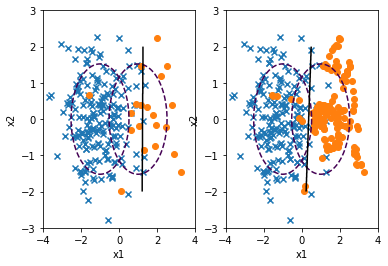

In [ ]:
X_samp, y_samp = SMOTETomek(random_state=4).fit_sample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)